# Linear Regression

## Introduction

https://www.analyticsvidhya.com/blog/2021/03/a-practical-tutorial-to-simple-linear-regression-using-python/

https://realpython.com/linear-regression-in-python/#what-is-regression

https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

https://analyticsindiamag.com/beginners-guide-to-linear-regression-in-python/

We’re living in the era of large amounts of data, powerful computers, and artificial intelligence. Data science and machine learning are driving image recognition, autonomous vehicles development, decisions in the financial and energy sectors, advances in medicine, the rise of social networks, and more. Linear regression is an important part of this.

Machine Learning (ML): ML is an application of Artificial Intelligence (AI) that provides systems the ability to automatically learn themselves and improve from the experience without being explicitly programmed. ML focuses on the development of computer programs that can access data and use it to learn themselves.

Supervised Learning: The model is trained using ‘labeled data’. Datasets are said to contain labels that contain both input and output parameters. To simplify – ‘Data is already tagged with the correct answer’.

What is Regression?

>Regression searches for relationships among variables.Regression analysis is one of the most important fields in statistics and machine learning. There are many regression methods available. Linear regression is one of them. Generally, in regression analysis, you need to find a function that maps some features or variables to others sufficiently well. The dependent features are called the **dependent variables, outputs, or responses**. The independent features are called the **independent variables, inputs, or predictors**. It is a common practice to denote the **outputs with 𝑦 and inputs with 𝑥**. If there are two or more independent variables, they can be represented as the vector 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of inputs.

Why do we need Regression?

>- We need regression to answer whether and how some phenomenon influences the other or how several variables are related. For example, we can use it to determine if and to what extent the experience or gender impact salaries.
- Regression is also useful when you want to forecast a response using a new set of predictors. For example, you could try to predict electricity consumption of a household for the next hour given the outdoor temperature, time of day, and number of residents in that household.

Types of Regression:

- Simple Linear Regression
- Multiple Linear Regression
- Polynomial Regression
- Advanced Linear Regression

Steps involved in performing Regression are:

- Importing the packages and classes we need.
- Defining data to work with and eventually doing appropriate transformations.
- Creating a regression model and fitting it with existing data.
- Checking the results of model fitting to know whether the model is satisfactory.
- Applying the model for predictions.

## Content

1. <a href = "#1.-Important-Terms-and-Concepts">Important Terms and Concepts</a>
2. <a href = "#2.-Simple-Linear-Regression">Simple Linear Regression</a>
3. <a href = "#3.-Multiple-Linear-Regression">Multiple Linear Regression</a>
4. <a href = "#4.-Polynomial-Regression">Polynomial Regression</a>
5. <a href = "#5.-Advanced-Linear-Regression">Advanced Linear Regression</a>

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

## 1. Important Terms and Concepts

When implementing linear regression of some dependent variable 𝑦 on the set of independent variables 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of predictors, you assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀. This equation is the regression equation. **𝛽₀, 𝛽₁, …, 𝛽ᵣ are the regression coefficients**, and **𝜀 is the random error**.

Linear regression calculates the **estimators** of the regression coefficients or simply the predicted weights, denoted with 𝑏₀, 𝑏₁, …, 𝑏ᵣ. They define the **estimated regression function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ**. This function should capture the dependencies between the inputs and output sufficiently well.

The **estimated or predicted response**, 𝑓(𝐱ᵢ), for each observation 𝑖 = 1, …, 𝑛, should be as close as possible to the corresponding **actual response 𝑦ᵢ**. The differences 𝑦ᵢ - 𝑓(𝐱ᵢ) for all observations 𝑖 = 1, …, 𝑛, are called the **residuals**. Regression is about determining the best predicted weights, that is the weights corresponding to the smallest residuals.

To get the best weights, you usually **minimize the sum of squared residuals (SSR)** for all observations 𝑖 = 1, …, 𝑛: SSR = Σᵢ(𝑦ᵢ - 𝑓(𝐱ᵢ))². This approach is called the **method of ordinary least squares**.

The **coefficient of determination, denoted as 𝑅²**, tells you which amount of variation in 𝑦 can be explained by the dependence on 𝐱 using the particular regression model. **Larger 𝑅² indicates a better fit** and means that the model can better explain the variation of the output with different inputs. The value of r-square always increases as new variables(attributes) are added to the model, no matter that the newly added attributes have a positive impact on the model or not. also, it can lead to over fitting of the model if there are large no. of variables.

The value 𝑅² = 1 corresponds to SSR = 0, that is to the **perfect fit** since the values of predicted and actual responses fit completely to each other.

**Adjusted r-square** is a modified form of r-square whose value increases if new predictors tend to improve model’s performance and decreases if new predictors does not improve performance as expected.

**Models**: Those are output by algorithms and are comprised of model data and a prediction algorithm.

**Training Model**: In supervised learning, an ML Algorithm builds a model by examining many examples and attempting to find a model that minimizes loss and improves prediction accuracy.

[<a href="#Content">Back to Content</a>]

## 2. Simple Linear Regression

Simple or single-variate linear regression is the simplest case of linear regression with a single independent variable, 𝐱 = 𝑥.

The following figure illustrates simple linear regression:

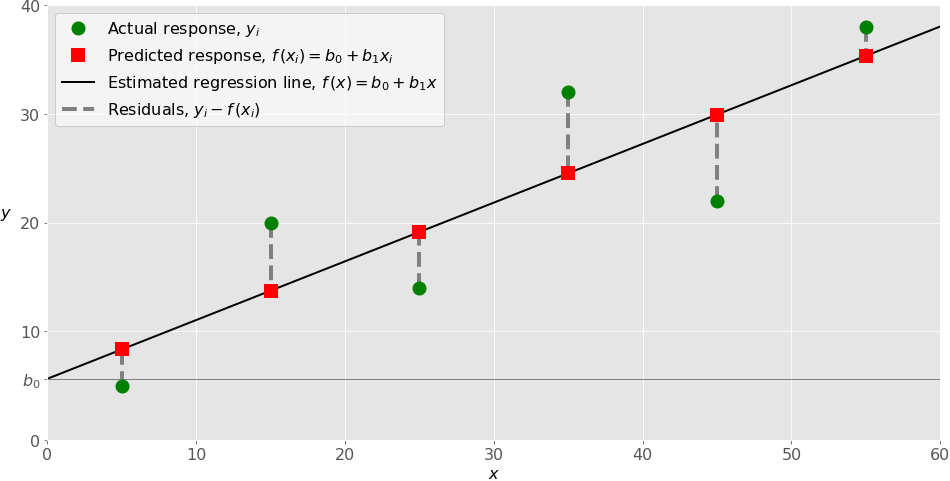

>When implementing simple linear regression, we typically start with a given set of input-output (𝑥-𝑦) pairs (green circles). These pairs are our observations. For example, the leftmost observation (green circle) has the input 𝑥 = 5 and the actual output (response) 𝑦 = 5. The estimated regression function (black line) has the equation 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥. Our goal is to calculate the optimal values of the predicted weights 𝑏₀ and 𝑏₁ that minimize SSR and determine the estimated regression function. The value of 𝑏₀, also called the **intercept**, shows the point where the estimated regression line crosses the 𝑦 axis. It is the value of the estimated response 𝑓(𝑥) for 𝑥 = 0. The value of **𝑏₁ determines the slope of the estimated regression line**.The predicted responses (red squares) are the points on the regression line that correspond to the input values. For example, for the input 𝑥 = 5, the predicted response is 𝑓(5) = 8.33 (represented with the leftmost red square).The residuals (vertical dashed gray lines) can be calculated as 𝑦ᵢ - 𝑓(𝐱ᵢ) = 𝑦ᵢ - 𝑏₀ - 𝑏₁𝑥ᵢ for 𝑖 = 1, …, 𝑛. They are the distances between the green circles and red squares. When we implement linear regression, we are actually trying to minimize these distances and make the red squares as close to the predefined green circles as possible.

In [2]:
#Reading Dataset from pkl file
basepath = '../../Data\\'
df = pd.read_pickle(basepath+ 'AgesAndHeights.pkl')
df.head()

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


In [3]:
clean_df = df[df['Age']>0]
clean_df.isnull().sum()

Age       0
Height    0
dtype: int64

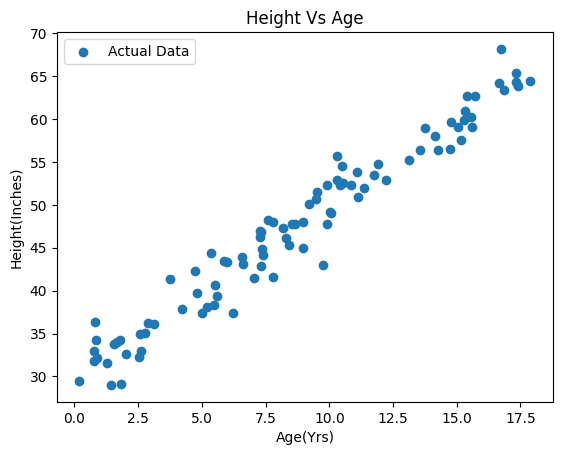

In [4]:
#Visualization of Actual Data
ages = clean_df[['Age']]
heights = clean_df['Height']
plt.scatter(ages,heights, label = 'Actual Data')
plt.title('Height Vs Age')
plt.xlabel('Age(Yrs)')
plt.ylabel('Height(Inches)')
plt.legend()

In [5]:
#Building model
model = LinearRegression()
model.fit(ages, heights)

LinearRegression()

In [6]:
#Result
y = heights
X = ages
r_sq = model.score(ages, heights)
adjusted_r_squared = 1 - (1-r_sq)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('coefficient of determination:', r_sq)
print('adjusted_r_squared:', adjusted_r_squared)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.954958596651655
adjusted_r_squared: 0.9544636361752995
intercept: 29.961857614615845
slope: [2.0014169]


>It shows that the predictor variables/independant variables explains the variance of response variable/dependant variable by 95.49% in the simple linear regression model whereas in case of adjusted R-Square, it shows that the predictor variables tends to improve the model performance by 94.98%.

In [7]:
#Prediction
y_pred = model.predict(ages)
print('predicted response:', y_pred)

predicted response: [59.51852983 36.18160357 44.50598813 33.59478891 63.49311126 40.67196595
 47.28555165 38.37980295 44.68566341 33.30057763 46.56753117 59.48172578
 60.55441984 63.29614048 31.68145078 46.84046677 53.82647578 31.49951265
 52.70200153 32.55565241 50.60059065 64.77320768 50.596527   42.44598738
 61.08695501 35.51271584 61.17993762 45.12839042 34.04806453 49.78919876
 35.71097799 33.04868164 40.89364203 60.07042681 41.95780206 39.57924823
 47.87437881 40.00939044 49.76698376 40.37485961 30.35350605 31.74746959
 44.59180672 51.68638204 61.38163107 31.58734001 60.78657484 48.40691423
 47.94489626 37.45456019 31.46677323 43.16389776 49.47792764 44.77423534
 64.64065989 51.04492208 60.3196813  48.91471277 57.07488319 45.57555718
 35.00363381 39.40187117 50.05340038 53.52104581 47.04871473 35.13263367
 32.83990112 50.78944559 63.70441223 54.42848169 49.00487902 50.13987434
 46.36590136 50.97047289 44.51953556 52.23684336 33.56359501 45.55263839
 44.03047717 41.68852089 64.672

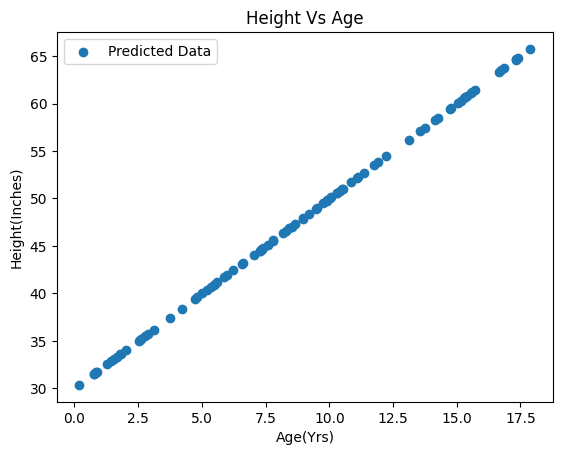

In [8]:
#Visualization of Predicted Data
plt.scatter(ages,y_pred, label = 'Predicted Data')
plt.title('Height Vs Age')
plt.xlabel('Age(Yrs)')
plt.ylabel('Height(Inches)')
plt.legend()

In [9]:
#Prediction for new data
age_new = np.array([15,17,20]).reshape((-1, 1))
y_pred = model.predict(age_new)
print('predicted response:', y_pred)

predicted response: [59.9831111  63.9859449  69.99019559]


c:\program files\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[<a href="#Content">Back to Content</a>]

## 3. Multiple Linear Regression

Multiple or multivariate linear regression is a case of linear regression with two or more independent variables.

If there are just two independent variables, the estimated regression function is 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂. It represents a regression plane in a three-dimensional space. The goal of regression is to determine the values of the weights 𝑏₀, 𝑏₁, and 𝑏₂ such that this plane is as close as possible to the actual responses and yield the minimal SSR.

The case of more than two independent variables is similar, but more general. The estimated regression function is 𝑓(𝑥₁, …, 𝑥ᵣ) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ +𝑏ᵣ𝑥ᵣ, and there are 𝑟 + 1 weights to be determined when the number of inputs is 𝑟.

In [10]:
# Importing the dataset
dataset = pd.read_csv(basepath + '50_Startups.csv')
#Dividing dataset into Input X and Output y
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
#Convert categorical columns
states=pd.get_dummies(X['State'],drop_first=True)
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [12]:
# Drop the state coulmn
X=X.drop('State',axis=1)
# Concat the dummy variables
X=pd.concat([X,states],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [13]:
#Checking Multicolinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

chk_df = X
calc_vif(chk_df)

,variables,VIF
0,R&D Spend,8.451019
1,Administration,4.950277
2,Marketing Spend,8.092278
3,Florida,2.004519
4,New York,1.928836


>Interpretation:
- VIF starts at 1 and has no upper limit.
- VIF = 1, no correlation between the independent variable and the other variables.
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others.
- 'R&D Spend' and 'Marketing Spend' have values greater than 5 which means they have high multicollinearity between this independent variable and the others.

In [14]:
# Drop the "Marketing Spend" coulmn
X=X.drop('Marketing Spend',axis=1)

In [15]:
#Checking Multicolinearity after removing high correlated column
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

chk_df = X
calc_vif(chk_df)

,variables,VIF
0,R&D Spend,3.917998
1,Administration,4.863405
2,Florida,1.881915
3,New York,1.909248


In [16]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [19]:
#Result
r_sq=r2_score(y_test,y_pred)
adjusted_r_squared = 1 - (1-r_sq)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('R-Square:', r_sq)
print('adjusted_r_squared:', adjusted_r_squared)
print('intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)

R-Square: 0.9477002402858664
adjusted_r_squared: 0.9430513727557213
intercept: 48444.52707097882
Coefficients: [ 8.51613579e-01 -1.69679775e-03  4.84732966e+02  1.73195428e+02]


>It shows that the predictor variables/independant variables explains the variance of response variable/dependant variable by 94.77% in the simple linear regression model whereas in case of adjusted R-Square, it shows that the predictor variables tends to improve the model performance by 94.30%.

[<a href="#Content">Back to Content</a>]

## 4. Polynomial Regression

Polynomial regression has a single independent variable, and the estimated regression function is a polynomial of degree 2: 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥 + 𝑏₂𝑥². Keeping this in mind, compare the previous regression function with the function 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂ used for linear regression. They look very similar and are both linear functions of the unknowns 𝑏₀, 𝑏₁, and 𝑏₂. This is why you can solve the polynomial regression problem as a linear problem with the term 𝑥² regarded as an input variable.

In the case of two variables and the polynomial of degree 2, the regression function has this form: 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂ + 𝑏₃𝑥₁² + 𝑏₄𝑥₁𝑥₂ + 𝑏₅𝑥₂². The procedure for solving the problem is identical to the previous case. The choice of the optimal degree of the polynomial regression function has no straightforward rule, it depends on the case. However, we should be aware of two problems that might follow the choice of the degree: underfitting and overfitting.

**Underfitting** occurs when a model can’t accurately capture the dependencies among data, usually as a consequence of its own simplicity. It often yields a low 𝑅² with known data and bad generalization capabilities when applied with new data.

**Overfitting** happens when a model learns both dependencies among data and random fluctuations. In other words, a model learns the existing data too well. Complex models, which have many features or terms, are often prone to overfitting. When applied to known data, such models usually yield high 𝑅². However, they often don’t generalize well and have significantly lower 𝑅² when used with new data.

In [20]:
# Importing the dataset
dataset = pd.read_csv(basepath + '50_Startups.csv')
#Dividing dataset into Input X and Output y
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [21]:
#Convert categorical columns
states=pd.get_dummies(X['State'],drop_first=True)
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [22]:
# Drop the state coulmn
X=X.drop('State',axis=1)
# Concat the dummy variables
X=pd.concat([X,states],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [23]:
#Checking Multicolinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

chk_df = X
calc_vif(chk_df)

,variables,VIF
0,R&D Spend,8.451019
1,Administration,4.950277
2,Marketing Spend,8.092278
3,Florida,2.004519
4,New York,1.928836


In [24]:
# Drop the "Marketing Spend" coulmn
X=X.drop('Marketing Spend',axis=1)

In [25]:
#Checking Multicolinearity after removing high correlated column
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

chk_df = X
calc_vif(chk_df)

,variables,VIF
0,R&D Spend,3.917998
1,Administration,4.863405
2,Florida,1.881915
3,New York,1.909248


Now we need to include 𝑥² (and perhaps other terms) as additional features when implementing polynomial regression. For that reason, we should transform the input dataframe to contain the additional column(s) with the values of 𝑥² (and eventually more features).The variable transformer refers to an instance of PolynomialFeatures which you can use to transform the input x.

You can provide several optional parameters to PolynomialFeatures:

- degree is an integer (2 by default) that represents the degree of the polynomial regression function.
- interaction_only is a Boolean (False by default) that decides whether to include only interaction features (True) or all features (False).
- include_bias is a Boolean (True by default) that decides whether to include the bias (intercept) column of ones (True) or not (False).

In [26]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(X)
X_ = transformer.transform(X)
X_

array([[1.65349200e+05, 1.36897800e+05, 0.00000000e+00, 1.00000000e+00,
        2.73403579e+10, 2.26359417e+10, 0.00000000e+00, 1.65349200e+05,
        1.87410076e+10, 0.00000000e+00, 1.36897800e+05, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.62597700e+05, 1.51377590e+05, 0.00000000e+00, 0.00000000e+00,
        2.64380120e+10, 2.46136480e+10, 0.00000000e+00, 0.00000000e+00,
        2.29151748e+10, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.53441510e+05, 1.01145550e+05, 1.00000000e+00, 0.00000000e+00,
        2.35442970e+10, 1.55199259e+10, 1.53441510e+05, 0.00000000e+00,
        1.02304223e+10, 1.01145550e+05, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.44372410e+05, 1.18671850e+05, 0.00000000e+00, 1.00000000e+00,
        2.08433928e+10, 1.71329410e+10, 0.00000000e+00, 1.44372410e+05,
        1.40830080e+10, 0.00000000e+00, 1.18671850e+05, 0.00000000e+00,
        0.000

In [27]:
#Creating and fitting the model
model = LinearRegression()
model = model.fit(X_,y)

In [28]:
#Result
r_sq = model.score(X_,y)
adjusted_r_squared = 1 - (1-r_sq)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('R-Square:', r_sq)
print('adjusted_r_squared:', adjusted_r_squared)
print('intercept:', model.intercept_)
print('Coefficients:', model.coef_)

R-Square: 0.9557782304153424
adjusted_r_squared: 0.9518474064522617
intercept: 35748.96660649995
Coefficients: [ 1.23008241e+00  1.80313548e-02  8.50177765e+03  4.11403084e+03
 -1.15290550e-08 -2.22657329e-06 -1.60026531e-01 -1.51651598e-01
  2.89226357e-07 -4.03609463e-02  2.39823848e-02  8.50177688e+03
  0.00000000e+00  4.11403010e+03]


>It shows that the predictor variables/independant variables explains the variance of response variable/dependant variable by 95.57% in the simple linear regression model whereas in case of adjusted R-Square, it shows that the predictor variables tends to improve the model performance by 95.18%.

In [29]:
#Prediction
y_pred = model.predict(X_)
print('predicted response:', y_pred, sep='\n')

predicted response:
[182750.88906111 190005.85568697 182816.18321678 170343.65419484
 176040.01108004 163762.82523936 165929.07088513 152638.02373466
 146535.74108422 162816.55254998 137657.81269512 142983.73231828
 128326.62680261 128809.50581532 142717.1541076  145564.97694639
 116988.68706637 127560.95866713 128728.54479126 120815.21602891
 115950.74485546 114903.92360971 113257.29682373 109935.2709426
 116986.11821505 103299.75596834 111908.18907955 111251.84962466
 102089.63855326 105526.94215861 104368.76969805 102238.52221019
 102616.35406976 100135.3184427   86566.75783424  90527.2932102
  77137.84578364  86589.44706371  66846.65404693  79525.58021742
  69721.97391637  77513.42519897  64170.04034696  66343.15002238
  65102.01731469  54453.45742426  55114.27346645  43495.43916747
  47447.42248546  41816.46627711]


[<a href="#Content">Back to Content</a>]

## 5. Advanced Linear Regression

We can implement linear regression in Python relatively easily by using the package **Statsmodels** as well. Typically, this is desirable when there is a need for more detailed results.

**Statsmodel** is a Python library designed for more statistically-oriented approaches to data analysis, with an emphasis on econometric analyses. It integrates well with the pandas and numpy libraries we covered in a previous post. It also has built in support for many of the statistical tests to check the quality of the fit and a dedicated set of plotting functions to visualize and diagnose the fit. Scikit-learn also has support for linear regression, including many forms of regularized regression lacking in statsmodels, but it lacks the rich set of statistical tests and diagnostics that have been developed for linear models.

In [30]:
# Importing the dataset
dataset = pd.read_csv(basepath + '50_Startups.csv')
#Dividing dataset into Input X and Output y
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [31]:
#Convert categorical columns
states=pd.get_dummies(X['State'],drop_first=True)
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [32]:
# Drop the state coulmn
X=X.drop('State',axis=1)
# Concat the dummy variables
X=pd.concat([X,states],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [33]:
#Checking Multicolinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

chk_df = X
calc_vif(chk_df)

,variables,VIF
0,R&D Spend,8.451019
1,Administration,4.950277
2,Marketing Spend,8.092278
3,Florida,2.004519
4,New York,1.928836


In [34]:
# Drop the "Marketing Spend" coulmn
X=X.drop('Marketing Spend',axis=1)

In [35]:
#Checking Multicolinearity after removing high correlated column
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

chk_df = X
calc_vif(chk_df)

,variables,VIF
0,R&D Spend,3.917998
1,Administration,4.863405
2,Florida,1.881915
3,New York,1.909248


In [36]:
#Adds a constant term to the predictor
X = sm.add_constant(X)
#Performing regression of the predictor on response variables
model = sm.OLS(y, X)

In [37]:
#Fitting the model
results = model.fit()

In [38]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           2.90e-28
Time:                        13:23:38   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1064.
Df Residuals:                      45   BIC:                             1073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            5.46e+04   6371.060      8.

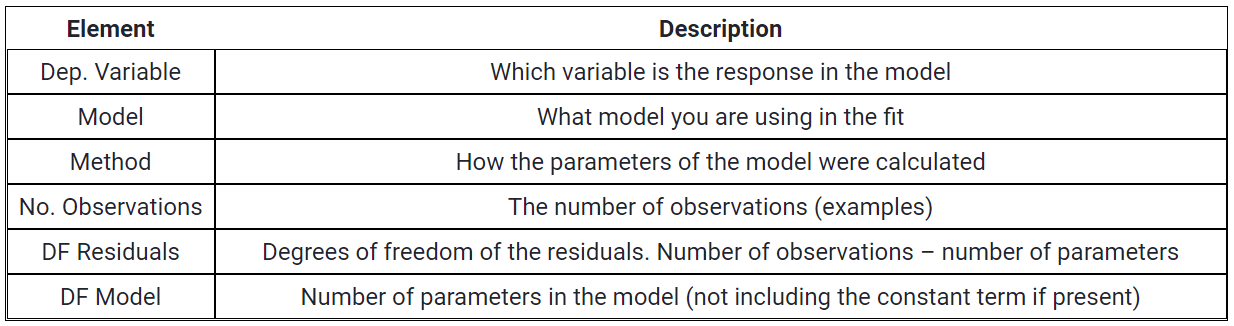

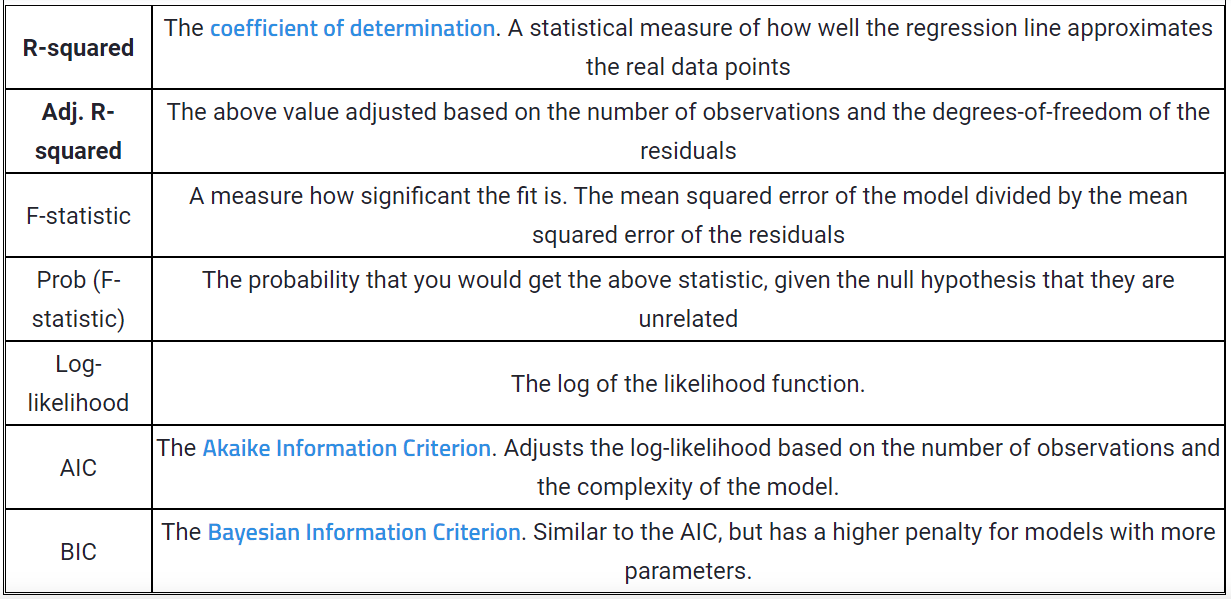

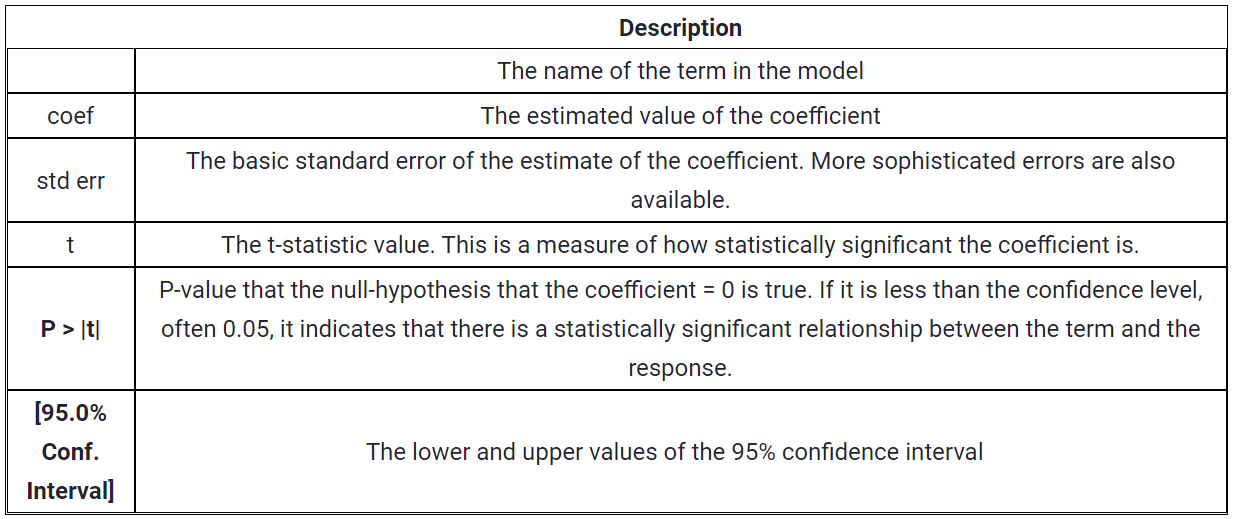

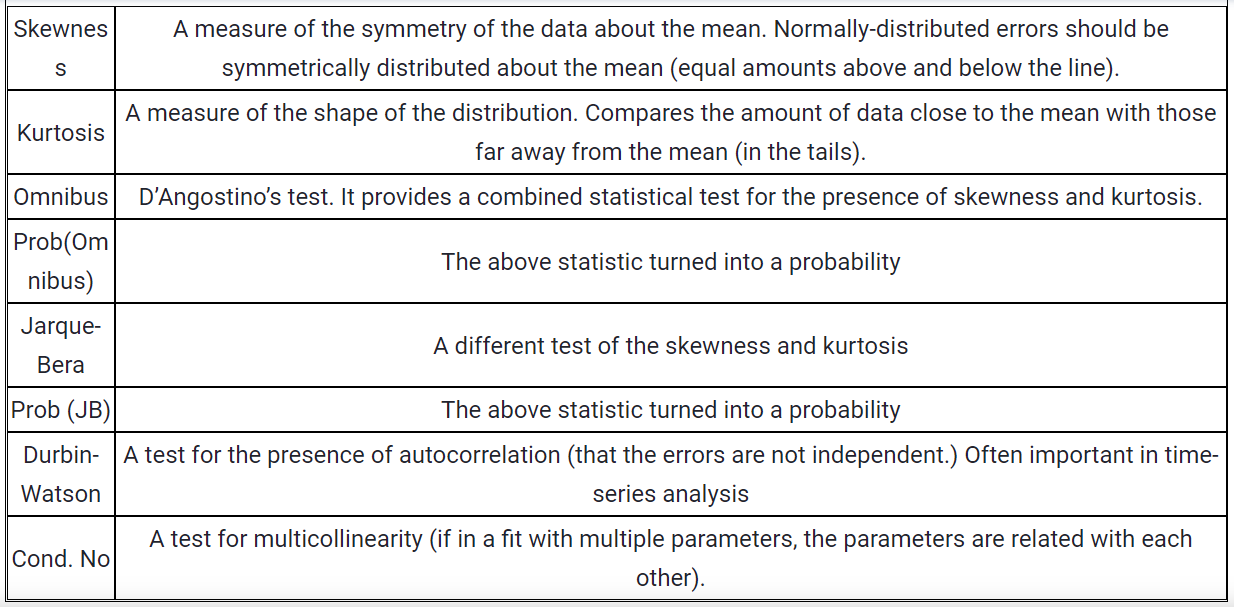

In [39]:
#Result
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.9479799298023537
adjusted coefficient of determination: 0.9433559235625629
regression coefficients: const             54604.815108
R&D Spend             0.860907
Administration       -0.052704
Florida            1091.107518
New York            -39.343362
dtype: float64


[<a href="#Content">Back to Content</a>]

In [40]:
#tested :no errors